# Assignment 1 
**IND 320 -  Data to Decision 2025** \
by Amelie Leonardi

**Statement of the use of the AI:** 

I used ChatGPT (GPT‑4.1 and GPT-5.0) and GitHub Copilot in VS Code to accelerate routine coding. AI helped mainly with the pandas reshaping for the LineChartColumn (one row per variable for the first month), the sidepar for the streamlit app, the setup of the wind rose and refine matplotlib titles, axis labels, and legends. I reviewed, adapted, and tested all suggestions; modeling choices and plots are my own. No synthetic data was generated, and no confidential data was shared.

GitHub Url: https://github.com/amelieleo/IND320_2025_amelieleo.git 

Streamlit URL: https://ind3202025amelieleo-mnnmvvqpfvkqeodzfyygsc.streamlit.app/ 

## Log:

For this Assignment the GitHub repository includes the Streamlit script (Assignment1_App1_AmelieLeonardi.py), the Jupyter Notebook, the requirement.txt and the data folder containing the .csv file used by the streamlit app and the Notebook. 

**The Notebook:** 

I opened the .csv file with pandas and looked at the head/tail information. I saw that we have hourly observations over one year, which is a useful information for further plotting choices. Further I reviewed the summary of the data to get a broader overview. I started with plotting temperature and wind speed/gust as line charts over time without further aggregation, which preserved the variability. It’s still pretty noisy so a summary of daily means could also be a good idea.  The precipitation is plotted as a daily sum bar chart. I chose a bar plot because it seems to be the main way of plotting precipitation and therefore makes it easier to understand for users. 

Plotting the wind direction was the most difficult variable for me. I tried line plots, but those created misleading jumps at the 0°/360° boundary. I chose a scatter plot over time to see variations over time and a wind rose for the summary of wind direction in a circular way. 

For an “all variables” view, I summarized temperature and wind speed/gust with weekly means and min–max bands, plotted daily precipitation as bars, and overlaid a weekly mean wind-direction quiver to show prevailing flow. I decided to use weekly summaries to make the figure clearer, so general trends are easily recognizable.\
A clearer analysis question would further guide choices like window sizes and which outliers to highlight.

**Streamlit App:** 

The Streamlit app is organized into four pages: Home, Data, Visualization, and Fun, with a sidebar navigation. The sidebar navigation is implemented by using streamlit.sidebar(). Data are loaded from the local CSV via a cached function (st.cache_data) for responsiveness. The first page has a quick description of the app. On the Data page, I reshape the first month’s subset so the table has one row per variable (each CSV column) and use a LineChartColumn to show that variable’s first-month series inline. On the Visualization page, I reuse the plots developed in the Notebook with matplotlib. The selected subset of the data by the slider and the dropdown menu is then transferred to individual functions for each plot type. The Fun page includes a fun fact.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Read the supplied CSV file using Pandas.

In [2]:
data_file = 'data/open-meteo-subset.csv'
dataframe = pd.read_csv(data_file, index_col='time')
dataframe.index = pd.to_datetime(dataframe.index)

## Print the contents of the dataframe in a relevant way.

In [3]:
dataframe.head() #just the first few entries

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


In [4]:
dataframe.tail() #just the last few entries

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-12-30 19:00:00,-6.5,0.0,1.6,4.0,58
2020-12-30 20:00:00,-7.0,0.0,1.2,3.4,50
2020-12-30 21:00:00,-7.5,0.0,1.1,2.4,22
2020-12-30 22:00:00,-7.2,0.0,0.6,1.6,22
2020-12-30 23:00:00,-7.5,0.0,0.5,0.7,8


In [5]:
dataframe.describe() #getting an overview of the data

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


## Plot each column separately.
### Temperature

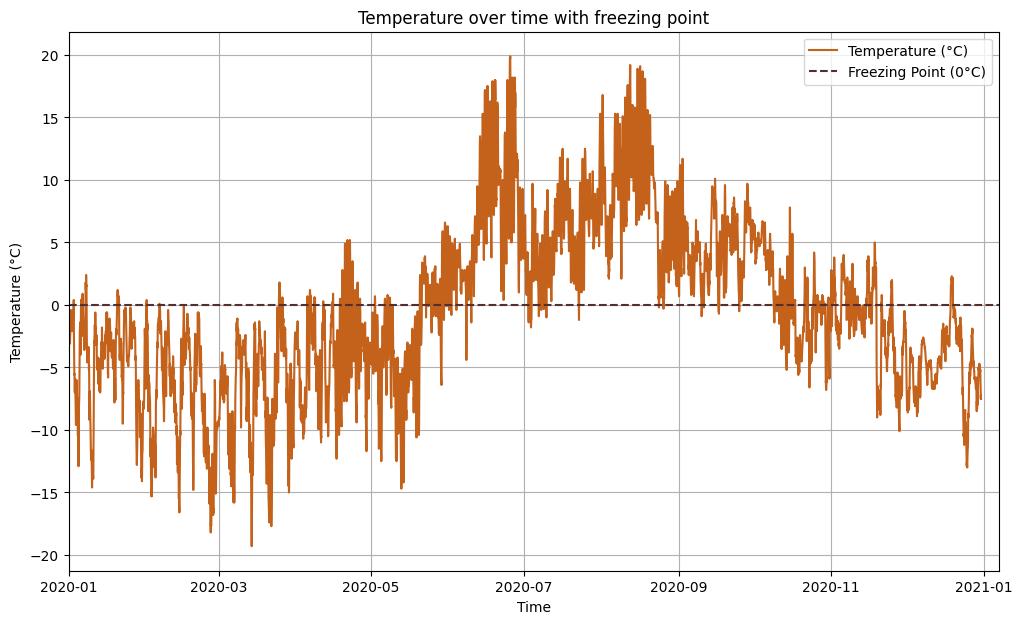

In [6]:
#plotting the temperature data with a horizontal line at 0 degrees Celsius
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(dataframe.index, dataframe['temperature_2m (°C)'], label='Temperature (°C)', color="#C4611A")
#plotting a horizontal line at 0°C
ax.hlines(y=0, xmin=dataframe.index.min(), xmax=dataframe.index.max() + pd.Timedelta(weeks=1), colors="#542F2F", linestyles='dashed', label='Freezing Point (0°C)')

#setting limits for x axis
ax.set_xlim([dataframe.index.min(), dataframe.index.max() + pd.Timedelta(weeks=1)])

#Makes the plot nice and readable
ax.grid()
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature over time with freezing point')
plt.show()

### Percipitation

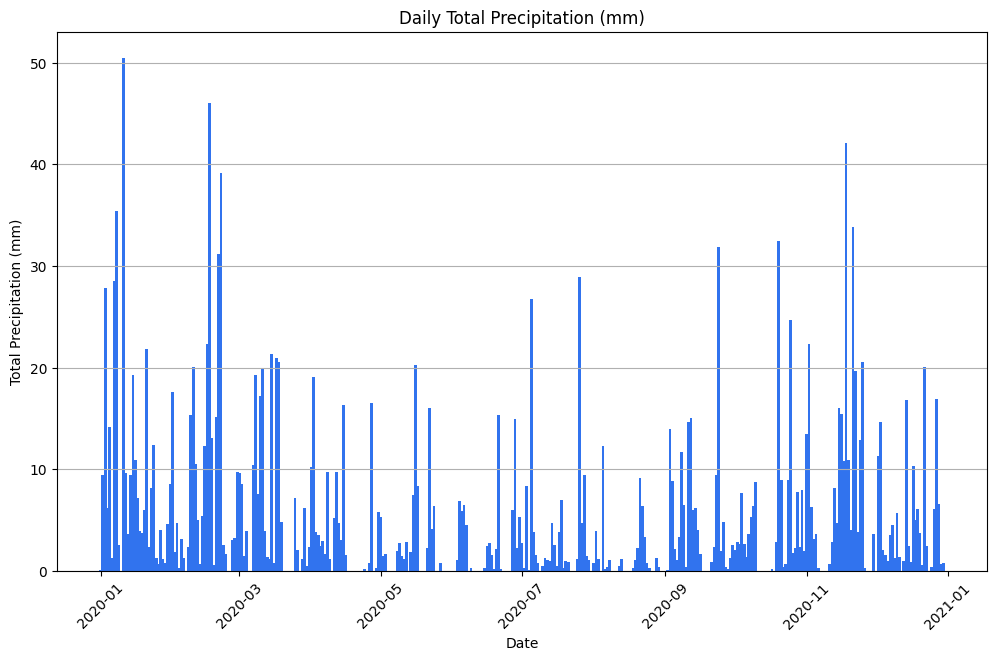

In [7]:
# Group by date and sum precipitation
daily_precip = dataframe['precipitation (mm)'].groupby(dataframe.index.date).sum()

#plotting the daily percipitation data
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(daily_precip.index, daily_precip.values, color="#3173EE", width=1.2) #bar plot for daily percipitation

#making the plot nice and readable
ax.set_xlabel('Date')
ax.set_ylabel('Total Precipitation (mm)')
ax.set_title('Daily Total Precipitation (mm)')
ax.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Wind Speed

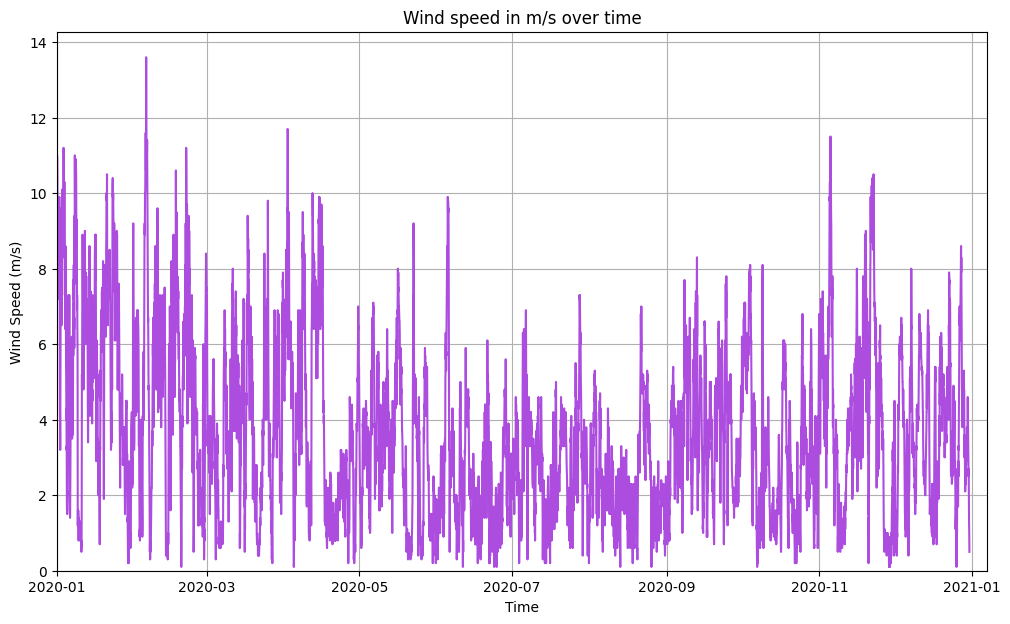

In [8]:
#plotting the wind speed data 
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(dataframe.index, dataframe['wind_speed_10m (m/s)'], color="#AD4DE0")

#setting limits for x and y axis
ax.set_xlim([dataframe.index.min(), dataframe.index.max() + pd.Timedelta(weeks=1)])
ax.set_ylim(bottom=0)

#making the plot nice and readable
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Wind speed in m/s over time')
plt.show()

### Wind gusts

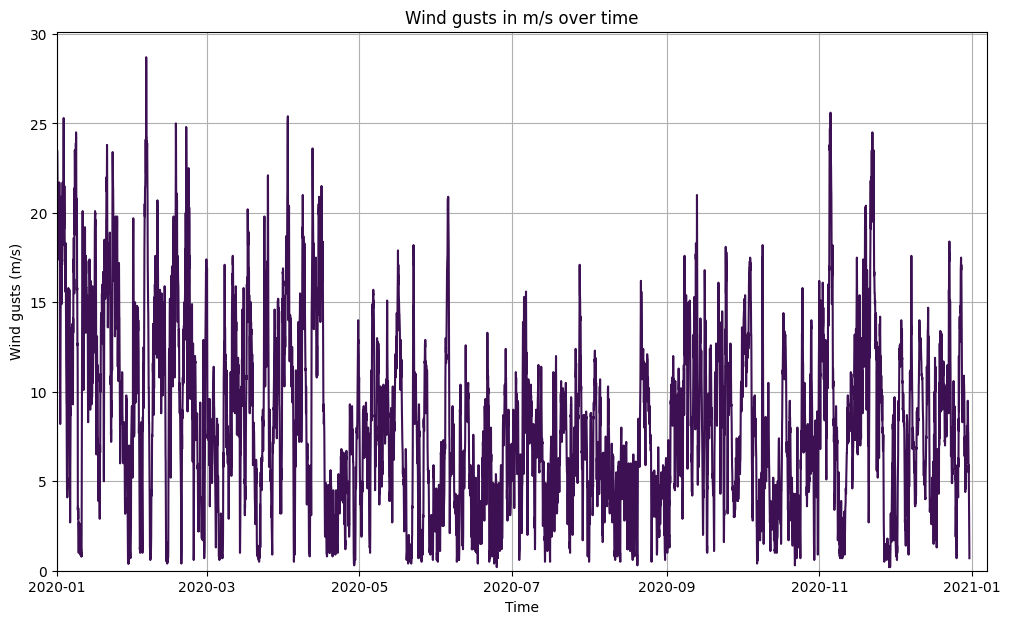

In [9]:
#plotting the wind gust data
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(dataframe.index, dataframe['wind_gusts_10m (m/s)'], color="#3C1053")

#setting limits for x and y axis
ax.set_xlim([dataframe.index.min(), dataframe.index.max() + pd.Timedelta(weeks=1)])
ax.set_ylim(bottom=0)

#making the plot nice and readable
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Wind gusts (m/s)')
ax.set_title('Wind gusts in m/s over time')
plt.show()

### Wind direction

C:\Users\ameli\AppData\Local\Temp\ipykernel_1040\920615771.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.5, 1, 1])  # Adjust so windrose doesn't overlap


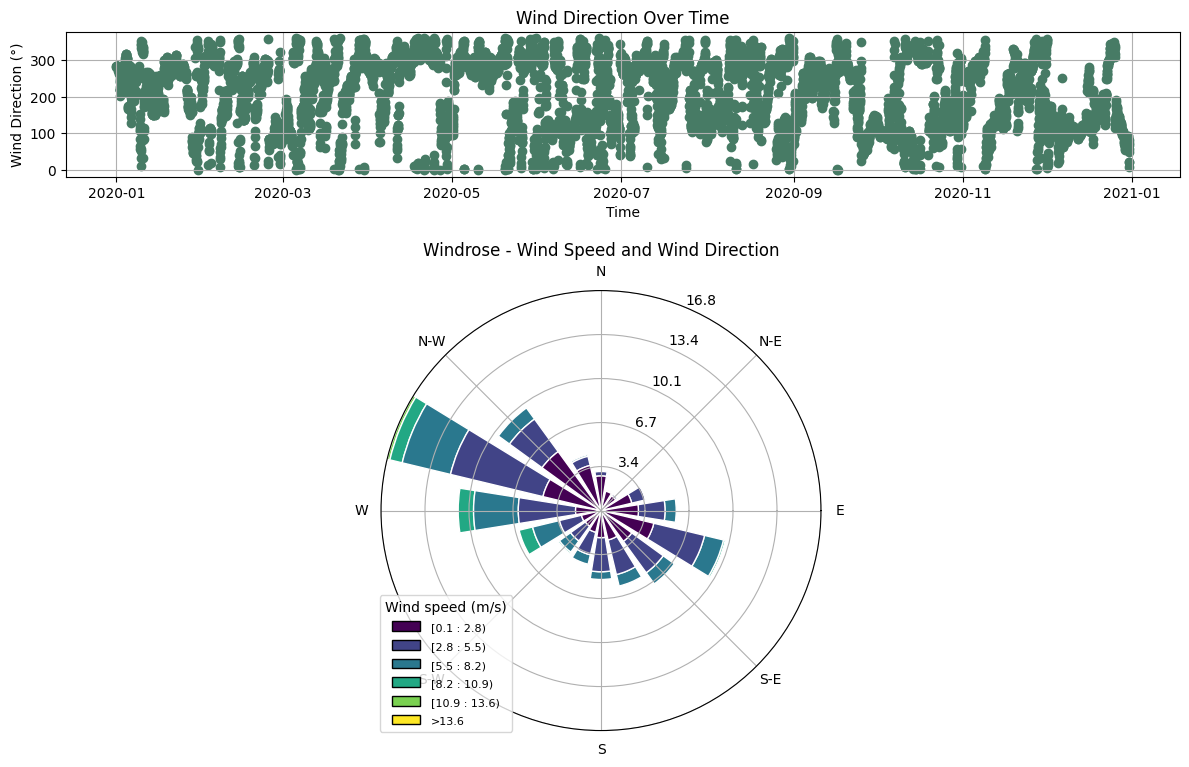

In [10]:
wind_dir = dataframe['wind_direction_10m (°)']
wind_spd = dataframe['wind_speed_10m (m/s)']

# Create a figure with two subplots: time series and windrose
fig = plt.figure(figsize=(12, 8))

# Subplot 1: Time series
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(dataframe.index, wind_dir, color="#477B65")
ax1.set_xlabel('Time')
ax1.set_ylabel('Wind Direction (°)')
ax1.set_title('Wind Direction Over Time')
ax1.grid(True)

# Subplot 2: Windrose
ax2 = WindroseAxes.from_ax(fig=fig, rect=[0.18, 0.08, 0.65, 0.55])
ax2.bar(
    wind_dir,
    wind_spd,
    normed=True,
    opening=0.8,
    edgecolor="#FFFFFF",
    cmap=plt.get_cmap('viridis')
)
ax2.set_title('Windrose - Wind Speed and Wind Direction')
ax2.set_legend(title="Wind speed (m/s)")

plt.tight_layout(rect=[0, 0.5, 1, 1])  # Adjust so windrose doesn't overlap
plt.show()

## Plot all columns together. 
Consider how to make this natural, given that the scales are different.

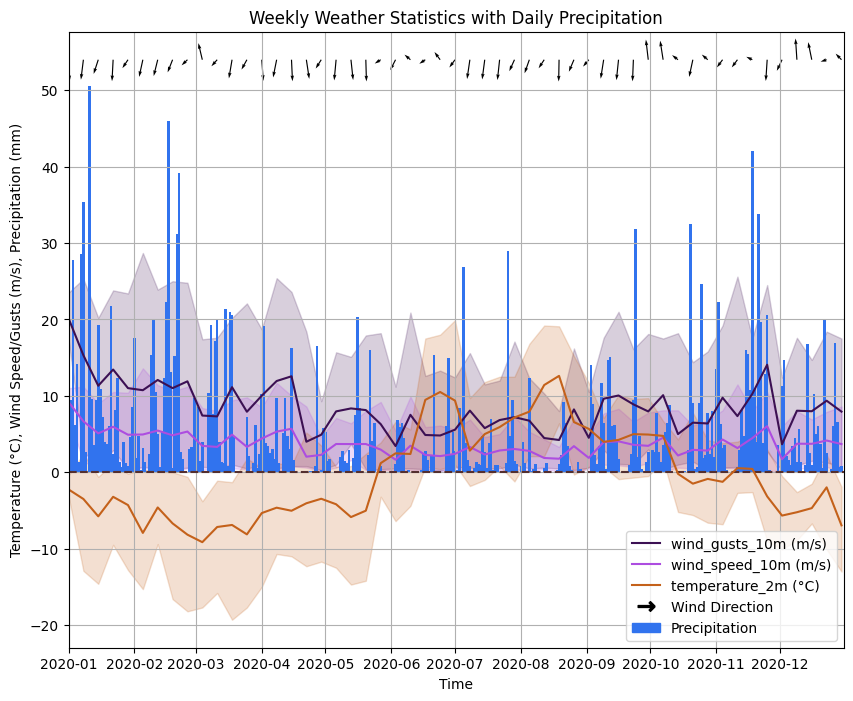

In [11]:
# Combined plot with weekly statistics and daily precipitation

#making a rule for resampling the data weekly, starting on the same weekday as the first entry in the dataframe
first_weekday = dataframe.index[0].strftime('%a').upper()[:3]
rule = f'W-{first_weekday}'

#resampling the data weekly to get mean, min and max values
weekly_mean = dataframe.resample(rule).mean()
weekly_min = dataframe.resample(rule).min()
weekly_max = dataframe.resample(rule).max()
#getting daily precipitation again
daily_precip = dataframe['precipitation (mm)'].groupby(dataframe.index.date).sum()

#calculating u and v components for wind direction arrows
weekly_dir_rad = np.deg2rad(weekly_mean['wind_direction_10m (°)'])
u = np.cos(weekly_dir_rad)
v = np.sin(weekly_dir_rad)

#setting up the plot
cols = ['wind_gusts_10m (m/s)', 'wind_speed_10m (m/s)', 'temperature_2m (°C)']
colors = ['#3C1053', '#AD4DE0', '#C4611A']

fig, ax = plt.subplots(figsize=(10, 8))
#plotting a horizontal line at 0 for oreintation
ax.hlines(y=0, xmin=dataframe.index.min(), xmax=dataframe.index.max(), colors="#542F2F", linestyles='dashed')

#plotting the weekly mean, min and max values of wind gusts, wind speed and temperature
for idx, col in enumerate(cols):
    ax.plot(weekly_mean.index, weekly_mean[col], label=col, color=colors[idx])
    ax.fill_between(
        weekly_mean.index,
        weekly_min[col],
        weekly_max[col],
        alpha=0.2,
        color=colors[idx]
    )
#plotting daily precipitation as bars in the background
ax.bar(daily_precip.index, daily_precip.values, color="#3173EE", width=1.2)

#adding wind direction arrows at the top of the plot
ax.quiver(
    weekly_mean.index,
    [ax.get_ylim()[1]] * len(u),
    u, v,
    angles='xy', scale_units='xy', scale=0.35, color='black', width=0.0015
)

# Custom legend handles
wind_patch = mlines.Line2D([], [], color='black', marker=r'$\rightarrow$', linestyle='None', markersize=12, label='Wind Direction')
precip_patch = mpatches.Patch(color="#3173EE", label="Precipitation")

# Add to legend
ax.legend(handles=[*ax.get_legend_handles_labels()[0], wind_patch, precip_patch], loc='lower right')
#making the plot nice and readable
ax.set_title('Weekly Weather Statistics with Daily Precipitation')
ax.set_ylabel('Temperature (°C), Wind Speed/Gusts (m/s), Precipitation (mm)')
ax.grid()
ax.set_xlim([dataframe.index.min(), dataframe.index.max()])
ax.set_xlabel('Time')   
plt.show()